In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# Load the dataset and set the column names
df = pd.read_csv('Dataset/ratings_Electronics.csv' ,names=['userId', 'productId','rating','timestamp'])

In [3]:
# Display shape
df.shape

(7824482, 4)

In [4]:
# Display columns
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

The dataset contains over 7.8 million entries. 
Taking 200000 random entries from the dataset as a sample because the dataset is too large.

In [5]:
product_data = df.sample(n=2000000, ignore_index=True)

In [6]:
# Delete the previous dataframe to release the memory
del df

In [7]:
# Display the top 5 records of the dataframe
product_data.head()

,userId,productId,rating,timestamp
0,A1X1XI6IAUF63B,B0041ELCE4,5.0,1377734400
1,A13QSTMJI6NKP1,B0037FS8WM,4.0,1317513600
2,A1R2V143B67E3O,B001NJ0D0Y,5.0,1402617600
3,A3J8UH1FQP10IP,B00AT91DNK,1.0,1401667200
4,A3RXPJOY5XEN8Y,B00CIUGG1M,4.0,1387238400


In [8]:
# Display information of the dataframe
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ MB


In [9]:
# Delete the unnecessary timestamp column
product_data.drop('timestamp', axis=1, inplace=True)

In [10]:
# Display data description
product_data.describe()

,rating
count,2.000000e+06
mean,4.011546e+00
std,1.381662e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
# Count null values
product_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
# Count duplicated values
product_data.duplicated().sum()

0

Proceeding forward due to zero null and duplicated values

Displaying Rating Distribution as a graph

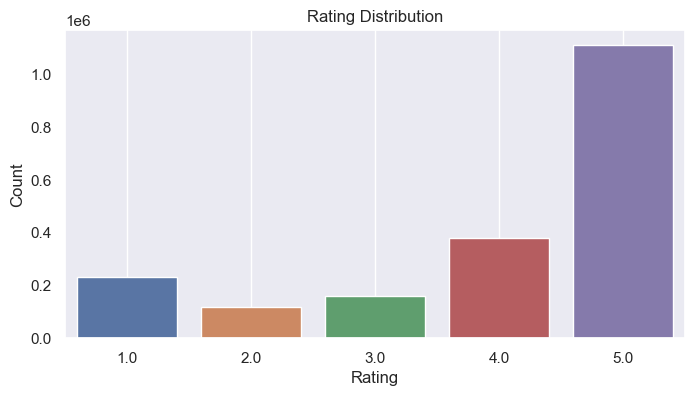

In [13]:
# Set size of the figure
plt.figure(figsize=(8,4))

# Create a count plot based on the 'rating' column
sns.countplot(x='rating',data=product_data)

# Add a title to the plot
plt.title('Rating Distribution')

# Add a label to the x-axis
plt.xlabel('Rating')

# Add a label to the y-axis
plt.ylabel('Count')

# Add a grid to the plot
plt.grid()

# Display plot
plt.show()

Analyzing the rating by user

In [14]:
print('Total rating : ',product_data.shape[0])
print('Total unique users : ',product_data['userId'].nunique())
print('Total unique products : ',product_data['productId'].nunique())

Total rating :  2000000
Total unique users :  1502732
Total unique products :  267175


In [15]:
# Count the number of rated products per user
no_of_rated_products_per_user = product_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A3OXHLG6DIBRW8    147
A5JLAU2ARJ0BO     132
ADLVFFE4VBT8      121
A680RUE1FDO8B     117
A6FIAB28IS79      115
Name: rating, dtype: int64

In [16]:
# Count the number of users who have rated more than 50 products
print('Number of users who have rated more than 50 products : {} '.format(sum(no_of_rated_products_per_user >= 50)))

Number of users who have rated more than 50 products : 52 


## Popularity Based Recommendation
To suggest products to user who just signed up

In [17]:
# Filter the products with more than 50 ratings and making a new dataframe
data = product_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [18]:
data.head()

,userId,productId,rating
1,A13QSTMJI6NKP1,B0037FS8WM,4.0
2,A1R2V143B67E3O,B001NJ0D0Y,5.0
5,A67LYX6288WI3,B005FIFDSQ,5.0
8,A1SRJJ3FINSQYY,B004CRSM4I,5.0
9,A15TM3K5VLY6FC,B002BH3I9U,4.0


In [19]:
# Calculate the number of ratings per product
# Sort the results in the descending order 
no_of_rating_per_product = data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [20]:
no_of_rating_per_product.head()

productId
B0074BW614    4784
B00DR0PDNE    4183
B007WTAJTO    3665
B006GWO5WK    3087
B0019EHU8G    3039
Name: rating, dtype: int64

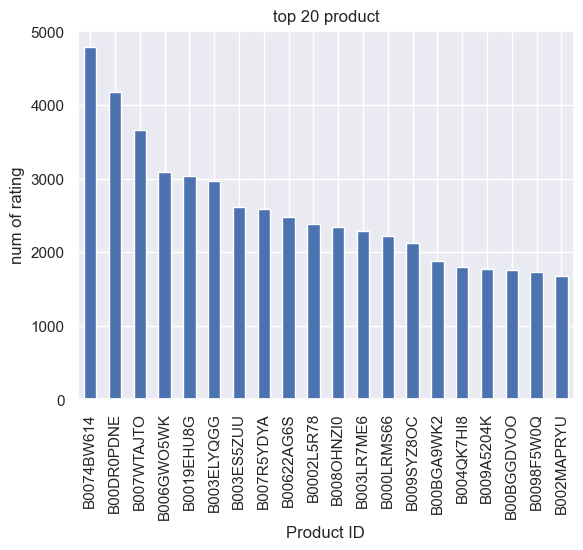

In [21]:
# Create a bar plot of the top 20 most rated products
no_of_rating_per_product.head(20).plot(kind='bar')

# Add a title to the plot
plt.title('top 20 product')

# Add label to the x-axis
plt.xlabel('Product ID')

# Add label to the x-axis
plt.ylabel('num of rating')

# Display plot
plt.show()

In [22]:
# Calculate the average rating for each product
# Create a new dataframe from that data
mean_rating_per_product = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [23]:
mean_rating_per_product.head()

,rating
productId,
0972683275,4.476395
1400501466,3.415385
1400532655,3.591304
140053271X,3.676768
1400599997,3.460317


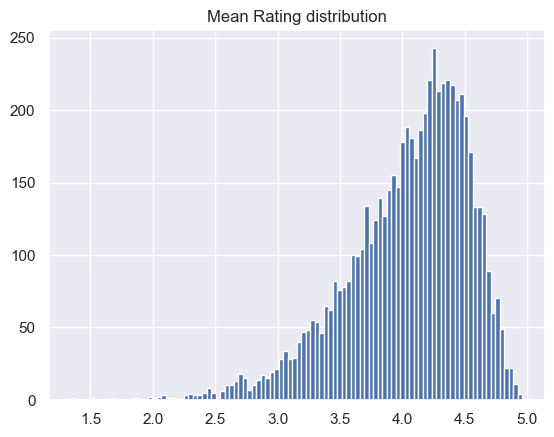

In [24]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating'],bins=100)

# Add a title to the histogram 
plt.title('Mean Rating distribution')

# Display histogram
plt.show()

In [25]:
# Check the skewness of the mean rating data
mean_rating_per_product['rating'].skew()

-0.9379527083490128

Moderately negatively skewed 

In [26]:
# Add a rating_count column to the mean_rating_per_product dataframe
mean_rating_per_product['rating_counts'] = data.groupby('productId')['rating'].count()

In [27]:
mean_rating_per_product.head()

,rating,rating_counts
productId,,
0972683275,4.476395,233
1400501466,3.415385,65
1400532655,3.591304,115
140053271X,3.676768,99
1400599997,3.460317,63


In [28]:
# Find the product with the highest mean rating
mean_rating_per_product[mean_rating_per_product['rating_counts'] == mean_rating_per_product['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.475543,4784


In [29]:
# The minimum number of ratings a product can have
min_rating_counts = mean_rating_per_product['rating_counts'].min()

# The number of products with the minimum number of ratings
total_min_rating_products = mean_rating_per_product[mean_rating_per_product['rating_counts']==min_rating_counts].shape[0]

print('Minimum rating count for a product :', min_rating_counts)
print('Total products with the minimum rating count :', total_min_rating_products)

Minimum rating count for a product : 50
Total products with the minimum rating count : 145


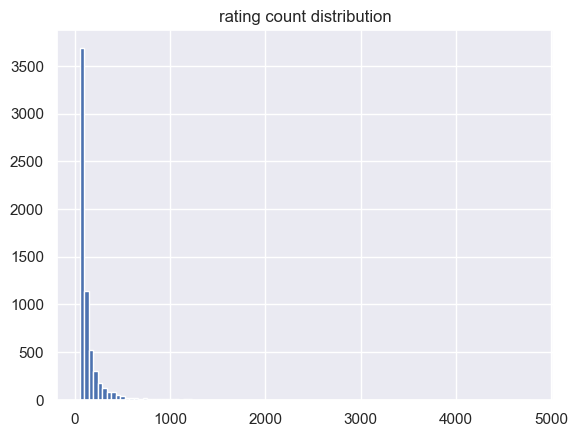

In [30]:
# Create histogram with 100 bins
plt.hist(mean_rating_per_product['rating_counts'],bins=100)

# Add a title to the histogram 
plt.title('rating count distribution')

# Display histogram
plt.show()

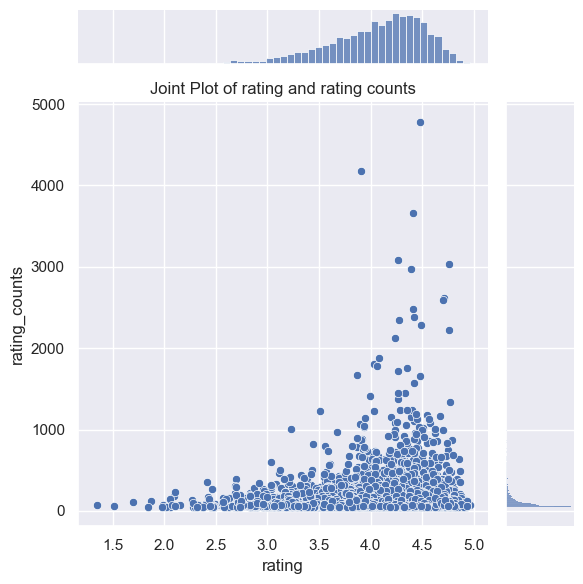

In [31]:
# Create a joint plot with x and y axes representing mean rating and rating count
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_per_product)

# Add a title to the joint plot
plt.title('Joint Plot of rating and rating counts')

# Prevent subplots from overlapping
plt.tight_layout()

# Display the joint plot
plt.show()

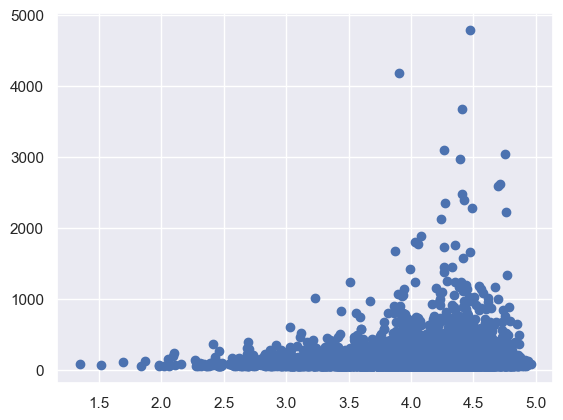

In [32]:
# Create a scatter plot with x and y axes representing mean rating and rating count
plt.scatter(x=mean_rating_per_product['rating'], y=mean_rating_per_product['rating_counts'])

# Display the scatter plot
plt.show()

In [33]:
# Calculate the Pearson correlation coefficient between mean rating and ratings count
correlation = mean_rating_per_product['rating'].corr(mean_rating_per_product['rating_counts'])
print(f'Correlation between Rating and Rating Counts is : {correlation}')

Correlation between Rating and Rating Counts is : 0.10142700997466553


Not much of a correlation

## Collaborative Filtering

In [34]:
# Import libraries for collaborative filtering approach
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [35]:
# Specify the rating scale of data 
reader = Reader(rating_scale=(1, 5))

# load the data from "data" into a format suitable for collaborative filtering
surprise_data = Dataset.load_from_df(data, reader)

In [36]:
#Split the surprise dataset into 80:20 ratio using train_test_split
trainSet, testSet = train_test_split(surprise_data, test_size=0.3,random_state=42)

#### Creating a collaborative filtering algorithm (KNNWithMeans) with specified parameters
k=5: Number of neighbors to consider

'name': Similarity measure (how similar two things are) to use 'pearson_baseline'

'user_based': Whether to use user-based or item-based collaborative filtering (set to False for item-based)

In [37]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})

# Train the collaborative filtering algorithm on the training dataset
algo.fit(trainSet)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [39]:
# Make predictions on the testing dataset and store the prediction objects in the 'test_pred' list
test_pred = algo.test(testSet)

In [ ]:
print("Item-based Model : Test Set")

# Calculate and print the Root Mean Squared Error (RMSE) for the collaborative filtering model on the test set 
# 'verbose=True' is set to display additional information
accuracy.rmse(test_pred ,verbose=True)